# NIT DELHI #
#**CSB352: Data Mining**

**Instructor: [Dr. Chandra Prakash]**

**Project Title : Disease Symptom Predictor**

**Group #4 Members**

**1.Name : PRASUN VERMA (181210036)**

**2.Name : DHARAM SINGH MEENA (181210020)**

**3.Name : ROHIT BYAS SHERWAN (181210043)**

In [ ]:
print('Hello Guys Welcome, If you join add your name below ')
print('Prasun was here...')
print('DSM was here...')
print("RBS was here")

Hello Guys Welcome, If you join add your name below 
Prasun was here...
DSM was here...
RBS was here


**Tasks to Do**

1. Analyse the Dataset, Clean it. (Done)

2. Exploratory Data Analysis.  (Done)

3. Create a model. (Naive bayes and NN) (Done) 

4. User interface (Done)

5. Conclusion (Done)


## Get the Data

**Get from Kaggle**

Just Uncomment it to get the data from Kaggle using API

In [ ]:
# Creating Dataset folder 
# !mkdir data

In [ ]:
# !ls

In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
 #changing the working directory
# !cd drive/MyDrive/Kaggle #Check the present working directory using pwd command

In [ ]:
# THIS was showing error so uploaded the file manually to data folder, 

# !kaggle datasets download -d itachi9604/disease-symptom-description-dataset

In [ ]:
#unzipping the zip files and deleting the zip files
# !unzip \*.zip -d data/  && rm *.zip

**Get from Your Drive**

In [ ]:
# Connecting to GDrive for Kaggle API fetch
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/Kaggle/"

## Read Data

In [ ]:
# import required libraries

import numpy as np
import pandas as pd

# sklearn things
from sklearn import preprocessing   # for encoding

In [ ]:
# read the csv files and 
# create the Dataframes

# FOR THIS DATA, PLEASE UPLOAD FILES (4 FILES) INTO DATA FOLDER THEN RUN THIS CELL

data = pd.read_csv(path+'data/dataset.csv')
sym_des = pd.read_csv(path+'data/symptom_Description.csv')
sym_pre = pd.read_csv(path+'data/symptom_precaution.csv')
sym_sev = pd.read_csv(path+'data/Symptom-severity.csv')

> Data contained in each file or dataframe is shown below.

> Data dataframe contains disease name and its symptoms as attributes.

In [ ]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [ ]:
data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,(vertigo) Paroymsal Positional Vertigo,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,malaise,chest_pain,chest_pain,loss_of_smell,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


We have 4920 samples

**Maximum Symptoms a disease have is = 17**


> Symptom description contains the description of each disease.

In [ ]:
sym_des.head(5)

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [ ]:
sym_des.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes


In [ ]:
sym_pre.head(5)

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [ ]:
sym_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


> Symptom precaution contains the precautions that one can take to recover.

In [ ]:
sym_sev.head(5)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [ ]:
sym_sev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
sym_sev.describe()

,weight
count,133.000000
mean,4.225564
std,1.323543
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


> Symptom severity contains data about each diesease severity. 1 - lowest and 7 - highest risk. so go to hospital

**Diseases Present in the Dataset**

In [ ]:
dis_list = data['Disease'].unique()

In [ ]:
print("No of diseases: ", len(dis_list))
print("Diseases are: ", dis_list)

No of diseases:  41
Diseases are:  ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


**List of symptoms**

In [ ]:
# get the list of unique symptoms
sym_list = list(sym_sev['Symptom'].unique())
sym_list.remove('prognosis')
# print info
print("No of symptoms: ", len(sym_list))
print(f"Symptoms are: {sym_list}")

No of symptoms:  131
Symptoms are: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', '

## Preprocessing data(DF)

**Check Missing values**

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total', '%'])
missing_data

,Total,%
Symptom_17,4848,98.5
Symptom_16,4728,96.1
Symptom_15,4680,95.1
Symptom_14,4614,93.8
Symptom_13,4416,89.8
Symptom_12,4176,84.9
Symptom_11,3726,75.7
Symptom_10,3408,69.3
Symptom_9,3228,65.6
Symptom_8,2976,60.5


since all symptoms are not present in all diseases so causes too many null/empty cells. 

First we need to reorganize the dataframe.

then we need to encode the symptoms.

**Reshaping DataFrame**

In [ ]:
# get a list of symptom column names 
cols = [i for i in data.iloc[:,1:].columns]
cols

['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [ ]:
# add all column names to variable column
# and add their respecitive values (symptom) 
# total size = old size * 17

tmp = pd.melt(data.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add1'] = 1  # for all if it is present then 1
tmp.head()

,index,variable,value,add1
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1


In [ ]:
# create new dataframe with encoded values
df = pd.pivot_table(tmp, 
                          values = 'add1',  # present or not
                          index = 'index',  # index column
                          columns = 'value') # symptoms columns

# Add labels column (i.e, disease column)
df.insert(0,'label',data['Disease'])

# fill 0 into NULL cells
df = df.fillna(0)

df.head(5)

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic _patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,...,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_ urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look_(typhos),ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.describe()

value,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic _patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,family_history,...,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_ urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look_(typhos),ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.209756,0.048780,0.045122,0.023171,0.023171,0.023171,0.046341,0.023171,0.021951,0.023171,0.023171,0.024390,0.023171,0.069512,0.091463,0.024390,0.023171,0.043902,0.141463,0.162195,0.023171,0.024390,0.024390,0.046341,0.023171,0.045122,0.114634,0.023171,0.115854,0.021951,0.047561,0.114634,0.021951,0.023171,0.068293,0.023171,0.024390,0.093902,0.021951,0.046341,...,0.046341,0.024390,0.024390,0.021951,0.021951,0.023171,0.024390,0.023171,0.159756,0.024390,0.023171,0.021951,0.021951,0.046341,0.024390,0.045122,0.021951,0.137805,0.070732,0.046341,0.023171,0.021951,0.024390,0.023171,0.024390,0.023171,0.021951,0.023171,0.023171,0.389024,0.021951,0.021951,0.021951,0.023171,0.092683,0.023171,0.023171,0.165854,0.185366,0.137805
std,0.407176,0.215431,0.207593,0.150461,0.150461,0.150461,0.210245,0.150461,0.146539,0.150461,0.150461,0.154273,0.150461,0.254349,0.288296,0.154273,0.150461,0.204899,0.348534,0.368667,0.150461,0.154273,0.154273,0.210245,0.150461,0.207593,0.318612,0.150461,0.320082,0.146539,0.212857,0.318612,0.146539,0.150461,0.252273,0.150461,0.154273,0.291723,0.146539,0.210245,...,0.210245,0.154273,0.154273,0.146539,0.146539,0.150461,0.154273,0.150461,0.366417,0.154273,0.150461,0.146539,0.146539,0.210245,0.154273,0.207593,0.146539,0.344730,0.256402,0.210245,0.150461,0.146539,0.154273,0.150461,0.154273,0.150461,0.146539,0.150461,0.150461,0.487578,0.146539,0.146539,0.146539,0.150461,0.290017,0.150461,0.150461,0.371987,0.388634,0.344730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

Created and checked the dataframe
(we only require data (dataframe))

checked null values (converted to 0) and also encoded the the data each symptom is now a column. 

So now we can go for EDA and check for parameters which are important and ones which we can drop before creating the model, then divide into training and test dataset


## Exploratory Data Analysis (EDA)

In [ ]:
 # Importing Libraries
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import scipy.stats

In [ ]:
# Creating List of diseases present in the db
diseaseslist = df['label'].unique()
print(f'Disease in the dataset : \n {diseaseslist}')
print(f'Number of diseases : {len(diseaseslist)}')

Disease in the dataset : 
 ['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
Number of diseases : 41


There are 41 diseases in the dataset

In [ ]:
df

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic _patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,...,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_ urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look_(typhos),ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,Acne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

mapping of each disease to index

In [ ]:
Disease_mapping = {
    0: "AIDS",
    1: "Acne",
    2: "Alcoholic hepatitis",
    3: "Allergy",
    4: "Arthritis",
    5: "Bronchial Asthma",
    6: "Cervical spondylosis",
    7: "Chicken pox",
    8: "Chronic cholestasis",
    9: "Common Cold",
    10: "Dengue",
    12:  "Diabetes",
    13:  "Dimorphic hemmorhoids(piles)",
    14:    "Drug Reaction",
    15:    "Fungal infection",
    16:    "GERD",
    17:    "Gastroenteritis",
    18:    "Heart attack",
    19:    "Hepatitis B",
    20:    "Hepatitis C",
    21:    "Hepatitis D",
    22:    "Hepatitis E",
    23:    "Hypertension",
    24:    "Hyperthyroidism",
    25:    "Hypoglycemia",
    26:    "Hypothyroidism",
    27:    "Impetigo",
    28:    "Jaundice",
    29:    "Malaria",
    30:    "Migraine",
    31:    "Osteoarthristis",
    32:    "Paralysis (brain hemorrhage)",
    33:    "Peptic ulcer diseae",
    34:    "Pneumonia",
    35:    "Psoriasis",
    36:    "Tuberculosis",
    37:    "Typhoid",
    38:    "Urinary tract infection",
    39:    "Varicose veins",
    40:    "hepatitis A" ,
}

In [ ]:
syms = df.columns
syms

Index(['label', ' abdominal_pain', ' abnormal_menstruation', ' acidity',
       ' acute_liver_failure', ' altered_sensorium', ' anxiety', ' back_pain',
       ' belly_pain', ' blackheads',
       ...
       ' watering_from_eyes', ' weakness_in_limbs',
       ' weakness_of_one_body_side', ' weight_gain', ' weight_loss',
       ' yellow_crust_ooze', ' yellow_urine', ' yellowing_of_eyes',
       ' yellowish_skin', 'itching'],
      dtype='object', name='value', length=132)

Mapping of Each disease to corresponding symptoms, with the sample count of each symptom.


In [ ]:
# function to get symptoms for a particular disease
def get_symptoms(dis):
  symp = []
  for col in syms:
    fil = df['label']==dis
    lis = df[fil][col].value_counts().to_frame()
    if(len(lis.index) > 1):
            symp.append(col)
  return symp

In [ ]:
get_symptoms('Allergy')

[' chills', ' continuous_sneezing', ' shivering', ' watering_from_eyes']

In [ ]:
# Main Function to get symptoms for each disease

def sym_dis():
  symp_dic={}
  for disease in diseaseslist:
    symp_dic[disease]=get_symptoms(disease)
  
  return symp_dic

In [ ]:
sym_dic = sym_dis()

The Dictionary of symptoms for each disease 

In [ ]:
for key, value in sym_dic.items():
    print("Disease: ", key)
    print("Symptoms: ", value)

Disease:  Fungal infection
Symptoms:  [' dischromic _patches', ' nodal_skin_eruptions', ' skin_rash', 'itching']
Disease:  Allergy
Symptoms:  [' chills', ' continuous_sneezing', ' shivering', ' watering_from_eyes']
Disease:  GERD
Symptoms:  [' acidity', ' chest_pain', ' cough', ' stomach_pain', ' ulcers_on_tongue', ' vomiting']
Disease:  Chronic cholestasis
Symptoms:  [' abdominal_pain', ' loss_of_appetite', ' nausea', ' vomiting', ' yellowing_of_eyes', ' yellowish_skin', 'itching']
Disease:  Drug Reaction
Symptoms:  [' burning_micturition', ' skin_rash', ' spotting_ urination', ' stomach_pain', 'itching']
Disease:  Peptic ulcer diseae
Symptoms:  [' abdominal_pain', ' indigestion', ' internal_itching', ' loss_of_appetite', ' passage_of_gases', ' vomiting']
Disease:  AIDS
Symptoms:  [' extra_marital_contacts', ' high_fever', ' muscle_wasting', ' patches_in_throat']
Disease:  Diabetes 
Symptoms:  [' blurred_and_distorted_vision', ' excessive_hunger', ' fatigue', ' irregular_sugar_level',

#### Count of Each Symptom in Dataframe

In [ ]:
# Creating a list of all symptoms
all_symps = list(df.columns)
# dropping label we dont need it
all_symps.remove('label') 
# Converting values to int type
X = df[all_symps].astype(int)

In [ ]:
symptoms_count= dict(X.sum())
symptoms_count

{' abdominal_pain': 1032,
 ' abnormal_menstruation': 240,
 ' acidity': 222,
 ' acute_liver_failure': 114,
 ' altered_sensorium': 114,
 ' anxiety': 114,
 ' back_pain': 228,
 ' belly_pain': 114,
 ' blackheads': 108,
 ' bladder_discomfort': 114,
 ' blister': 114,
 ' blood_in_sputum': 120,
 ' bloody_stool': 114,
 ' blurred_and_distorted_vision': 342,
 ' breathlessness': 450,
 ' brittle_nails': 120,
 ' bruising': 114,
 ' burning_micturition': 216,
 ' chest_pain': 696,
 ' chills': 798,
 ' cold_hands_and_feets': 114,
 ' coma': 120,
 ' congestion': 120,
 ' constipation': 228,
 ' continuous_feel_of_urine': 114,
 ' continuous_sneezing': 222,
 ' cough': 564,
 ' cramps': 114,
 ' dark_urine': 570,
 ' dehydration': 108,
 ' depression': 234,
 ' diarrhoea': 564,
 ' dischromic _patches': 108,
 ' distention_of_abdomen': 114,
 ' dizziness': 336,
 ' drying_and_tingling_lips': 114,
 ' enlarged_thyroid': 120,
 ' excessive_hunger': 462,
 ' extra_marital_contacts': 108,
 ' family_history': 228,
 ' fast_heart_

### Most Common Symptom and Least Common Symptom in the dataset

In [ ]:
max_sym = max(symptoms_count, key=symptoms_count.get)
min_sym = min(symptoms_count, key=symptoms_count.get)

print(f'Most Common Symptom : {max_sym}')
print(f'Least Common Symptom : {min_sym}')

Most Common Symptom :  fatigue
Least Common Symptom :  foul_smell_of urine


Dropping the prognosis instance from the symptom severity dataframe as it is not a symptom, its a label

In [ ]:
sym_sev.drop(axis=0,index=132,inplace=True)

In [ ]:
sym_sev

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
...,...,...
127,small_dents_in_nails,2
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2


#### Creating dictionary for Diseases with their details

In [ ]:
# Mapping of desc to disease
sym_details = sym_des.set_index('Disease')['Description'].to_dict()
sym_details

{'(vertigo) Paroymsal  Positional Vertigo': "Benign paroxysmal positional vertigo (BPPV) is one of the most common causes of vertigo — the sudden sensation that you're spinning or that the inside of your head is spinning. Benign paroxysmal positional vertigo causes brief episodes of mild to intense dizziness.",
 'AIDS': "Acquired immunodeficiency syndrome (AIDS) is a chronic, potentially life-threatening condition caused by the human immunodeficiency virus (HIV). By damaging your immune system, HIV interferes with your body's ability to fight infection and disease.",
 'Acne': 'Acne vulgaris is the formation of comedones, papules, pustules, nodules, and/or cysts as a result of obstruction and inflammation of pilosebaceous units (hair follicles and their accompanying sebaceous gland). Acne develops on the face and upper trunk. It most often affects adolescents.',
 'Alcoholic hepatitis': "Alcoholic hepatitis is a diseased, inflammatory condition of the liver caused by heavy alcohol consum

#### Creating Dictionary for Disease Precautions 

In [ ]:
# Mapping of precautions to diseases
sym_precs = sym_pre.set_index('Disease').to_dict()
sym_precs

{'Precaution_1': {'(vertigo) Paroymsal  Positional Vertigo': 'lie down',
  'AIDS': 'avoid open cuts',
  'Acne': 'bath twice',
  'Alcoholic hepatitis': 'stop alcohol consumption',
  'Allergy': 'apply calamine',
  'Arthritis': 'exercise',
  'Bronchial Asthma': 'switch to loose cloothing',
  'Cervical spondylosis': 'use heating pad or cold pack',
  'Chicken pox': 'use neem in bathing ',
  'Chronic cholestasis': 'cold baths',
  'Common Cold': 'drink vitamin c rich drinks',
  'Dengue': 'drink papaya leaf juice',
  'Diabetes ': 'have balanced diet',
  'Dimorphic hemmorhoids(piles)': 'avoid fatty spicy food',
  'Drug Reaction': 'stop irritation',
  'Fungal infection': 'bath twice',
  'GERD': 'avoid fatty spicy food',
  'Gastroenteritis': 'stop eating solid food for while',
  'Heart attack': 'call ambulance',
  'Hepatitis B': 'consult nearest hospital',
  'Hepatitis C': 'Consult nearest hospital',
  'Hepatitis D': 'consult doctor',
  'Hepatitis E': 'stop alcohol consumption',
  'Hypertension '

## Vizualization of attributes

Checking for Pearson's correlation among the attributes

In [ ]:
corrmat = df.corr()
corrmat

value,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic _patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,family_history,...,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_ urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look_(typhos),ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
value,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abdominal_pain,1.000000,-0.116670,-0.111995,0.298940,-0.079348,-0.079348,-0.113570,0.279030,-0.077184,-0.079348,-0.079348,-0.081460,-0.079348,-0.140816,-0.163467,-0.081460,-0.079348,-0.110400,-0.209131,-0.072298,-0.079348,0.306897,-0.081460,0.142901,-0.079348,-0.111995,-0.185384,-0.079348,0.665177,-0.077184,-0.115129,0.153095,-0.077184,0.279030,-0.139484,-0.079348,-0.081460,-0.165855,-0.077184,-0.113570,...,-0.113570,-0.081460,-0.081460,-0.077184,-0.077184,-0.079348,-0.081460,-0.079348,-0.224648,-0.081460,-0.079348,-0.077184,-0.077184,-0.113570,0.306897,-0.111995,-0.077184,-0.205971,-0.142139,-0.113570,0.279030,-0.077184,-0.081460,-0.079348,-0.081460,0.279030,-0.077184,-0.079348,-0.079348,0.479768,-0.077184,-0.077184,-0.077184,-0.079348,0.021263,-0.079348,0.279030,0.527264,0.733180,0.263282
abnormal_menstruation,-0.116670,1.000000,-0.049227,-0.034877,-0.034877,-0.034877,-0.049920,-0.034877,-0.033926,-0.034877,-0.034877,-0.035806,-0.034877,-0.061895,-0.071851,0.698212,-0.034877,-0.048526,-0.091923,-0.099639,0.680108,-0.035806,-0.035806,-0.049920,-0.034877,-0.049227,-0.081485,-0.034877,-0.081974,-0.033926,0.481392,0.256158,-0.033926,-0.034877,0.365122,-0.034877,0.698212,0.295865,-0.033926,-0.049920,...,0.461756,-0.035806,-0.035806,-0.033926,-0.033926,-0.034877,-0.035806,-0.034877,-0.098744,-0.035806,-0.034877,-0.033926,-0.033926,-0.049920,-0.035806,-0.049227,-0.033926,0.221528,-0.062477,-0.049920,-0.034877,-0.033926,0.698212,-0.034877,-0.035806,-0.034877,-0.033926,-0.034877,-0.034877,-0.180700,-0.033926,-0.033926,-0.033926,0.680108,0.298557,-0.034877,-0.034877,-0.100977,-0.108023,-0.090534
acidity,-0.111995,-0.049227,1.000000,-0.033480,-0.033480,-0.033480,-0.047919,-0.033480,-0.032566,-0.033480,-0.033480,-0.034371,-0.033480,0.356405,-0.068972,-0.034371,-0.033480,-0.046581,0.198354,-0.095646,-0.033480,-0.034371,-0.034371,-0.047919,-0.033480,-0.047254,0.235289,-0.033480,-0.078689,-0.032566,0.448298,-0.078220,-0.032566,-0.033480,-0.058853,-0.033480,-0.034371,0.292568,-0.032566,-0.047919,...,-0.047919,-0.034371,-0.034371,-0.032566,-0.032566,-0.033480,-0.034371,-0.033480,-0.094786,-0.034371,-0.033480,-0.032566,-0.032566,0.455129,-0.034371,0.433917,-0.032566,-0.086906,-0.059973,-0.047919,-0.033480,-0.032566,-0.034371,-0.033480,-0.034371,-0.033480,0.608981,-0.033480,0.669450,0.019355,-0.032566,-0.032566,-0.032566,-0.033480,-0.069477,-0.033480,-0.033480,-0.096931,-0.103694,-0.086906
acute_liver_failure,0.298940,-0.034877,-0.033480,1.000000,-0.023720,-0.023720,-0.033951,-0.023720,-0.023073,-0.023720,-0.023720,-0.024352,-0.023720,-0.042096,-0.048867,-0.024352,-0.023720,-0.033003,-0.062518,-0.067765,-0.023720,0.974071,-0.024352,-0.033951,-0.023720,-0.033480,-0.0554

Using HeatMap for graphical interpretation

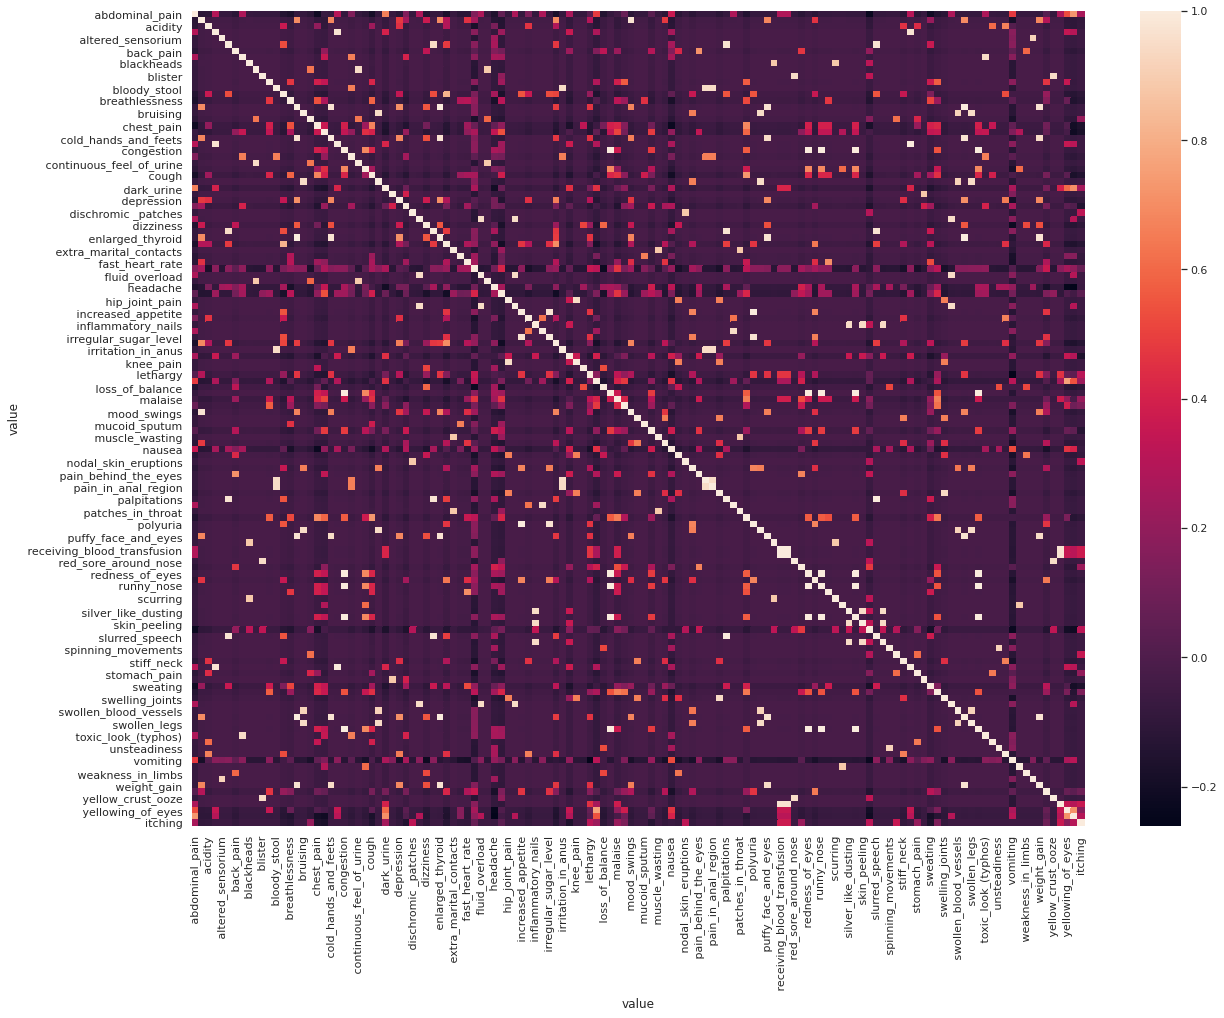

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(corrmat)

### Assigning Symptoms weight to each attribute


In [ ]:
# Creating copy of dataframe
df1 = df.copy()

# Mapping of weights to symptoms
sym_weight = sym_sev.set_index('Symptom')['weight'].to_dict()

In [ ]:
sym_weight

{'abdominal_pain': 4,
 'abnormal_menstruation': 6,
 'acidity': 3,
 'acute_liver_failure': 6,
 'altered_sensorium': 2,
 'anxiety': 4,
 'back_pain': 3,
 'belly_pain': 4,
 'blackheads': 2,
 'bladder_discomfort': 4,
 'blister': 4,
 'blood_in_sputum': 5,
 'bloody_stool': 5,
 'blurred_and_distorted_vision': 5,
 'breathlessness': 4,
 'brittle_nails': 5,
 'bruising': 4,
 'burning_micturition': 6,
 'chest_pain': 7,
 'chills': 3,
 'cold_hands_and_feets': 5,
 'coma': 7,
 'congestion': 5,
 'constipation': 4,
 'continuous_feel_of_urine': 6,
 'continuous_sneezing': 4,
 'cough': 4,
 'cramps': 4,
 'dark_urine': 4,
 'dehydration': 4,
 'depression': 3,
 'diarrhoea': 6,
 'dischromic_patches': 6,
 'distention_of_abdomen': 4,
 'dizziness': 4,
 'drying_and_tingling_lips': 4,
 'enlarged_thyroid': 6,
 'excessive_hunger': 4,
 'extra_marital_contacts': 5,
 'family_history': 5,
 'fast_heart_rate': 5,
 'fatigue': 4,
 'fluid_overload': 4,
 'foul_smell_ofurine': 5,
 'headache': 3,
 'high_fever': 7,
 'hip_joint_pain

In [ ]:
# Applying it to all the columns of the dataframe
for dis in df1.columns[1:]:
  s = dis.replace(' ','')
  #print(sym_weight[s])
  df1[dis] = df1[dis].replace(1.0,sym_weight[s])

In [ ]:
df1

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic _patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,...,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_ urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look_(typhos),ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4916,Acne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## CREATING TRAINING AND TESTING DATASET

In [ ]:
# For splitting
from sklearn.model_selection import train_test_split

In [ ]:
# Creating a list of all symptoms
all_symps = list(df1.columns)
# dropping label we dont need it
all_symps.remove('label') 

In [ ]:
# Converting values to int type
X = df1[all_symps].astype(int)

In [ ]:
# Features
X

value,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic _patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,family_history,...,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_ urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look_(typhos),ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,5,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,6,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Labels
y = df1['label']
y

index
0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: label, Length: 4920, dtype: object

In [ ]:
# Splitting Data into training and testing set
# also the indices are suffled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

### Training Dataset

In [ ]:
X_train

value,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic _patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,family_history,...,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_ urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look_(typhos),ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
392,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3886,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,4,0,0,...,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
4660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,7,3,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4089,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0
3273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y_train

index
392                   Psoriasis
3829                Chicken pox
3886            Hyperthyroidism
4660                  Pneumonia
4089             Varicose veins
                 ...           
57          Peptic ulcer diseae
3273            Osteoarthristis
2706           Fungal infection
578                 Chicken pox
2439    Urinary tract infection
Name: label, Length: 3936, dtype: object

##### There are 3936 samples in the training dataset

### Testing Dataset

In [ ]:
X_test

value,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic _patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,family_history,...,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_ urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look_(typhos),ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
858,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,4,3,1
3305,0,0,0,0,0,0,0,0,0,0,0,5,0,0,4,0,0,0,7,3,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,3,0,0,4,0,0
3420,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0
1466,4,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4558,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,...,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
1102,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2305,0,0,0,0,0,0,0,0,0,0,0,5,0,0,4,0,0,0,7,3,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,4,0,0


In [ ]:
y_test

index
3214                     Chicken pox
858              Chronic cholestasis
3305                    Tuberculosis
3420                          Dengue
1466                     Hepatitis E
                    ...             
4558                       Diabetes 
1102    Dimorphic hemmorhoids(piles)
2305                    Tuberculosis
1908                     Common Cold
1629                       Psoriasis
Name: label, Length: 984, dtype: object

##### There are 984 samples in testing dataset

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

One Hot Encoding 

In [ ]:
print(y_train)
disease = y_train
values = array(y_train)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

# for i in range(len(onehot_encoded)):
#   print(integer_encoded[i])


index
392                   Psoriasis
3829                Chicken pox
3886            Hyperthyroidism
4660                  Pneumonia
4089             Varicose veins
                 ...           
57          Peptic ulcer diseae
3273            Osteoarthristis
2706           Fungal infection
578                 Chicken pox
2439    Urinary tract infection
Name: label, Length: 3936, dtype: object
[35  8 24 ... 15  8 38]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
 Y_train = onehot_encoded
# print(Y_train.shape)

In [ ]:
print(Y_train.shape)

(3936, 41)


In [ ]:
inv_s1 = label_encoder.inverse_transform(integer_encoded)
remap = onehot_encoder.inverse_transform(onehot_encoded).ravel()
print(remap)
print(inv_s1)

[35  8 24 ... 15  8 38]
['Psoriasis' 'Chicken pox' 'Hyperthyroidism' ... 'Fungal infection'
 'Chicken pox' 'Urinary tract infection']


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## BUILDING MODEL
#### 1. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Creaeting the model

In [ ]:
#Model train
model = GaussianNB()
# model.fit(X, y)
model.fit(X_train, y_train)  # on our dataset

GaussianNB(priors=None, var_smoothing=1e-09)

Prediction on test dataset

In [ ]:
#Prediction
prediction = model.predict(X_test)
print(prediction)

['Chicken pox' 'Chronic cholestasis' 'Tuberculosis' 'Dengue' 'Hepatitis E'
 'Hypertension ' 'Psoriasis' 'Typhoid' 'Pneumonia' 'Alcoholic hepatitis'
 'Peptic ulcer diseae' 'Common Cold' 'Hepatitis C'
 'Paralysis (brain hemorrhage)' 'Cervical spondylosis' 'Hepatitis D'
 'Cervical spondylosis' 'Dimorphic hemmorhoids(piles)' 'Acne'
 'Hypothyroidism' 'Dimorphic hemmorhoids(piles)' 'Hepatitis E'
 'Hepatitis B' 'Impetigo' 'Chronic cholestasis' 'Fungal infection'
 'Psoriasis' 'Malaria' 'Pneumonia' 'Acne' 'Malaria'
 'Paralysis (brain hemorrhage)' 'Diabetes ' 'Osteoarthristis' 'Dengue'
 'Osteoarthristis' 'Alcoholic hepatitis' 'Peptic ulcer diseae'
 'Gastroenteritis' 'Urinary tract infection' 'Osteoarthristis'
 'hepatitis A' 'Psoriasis' 'Typhoid' 'Hepatitis B' 'Varicose veins' 'GERD'
 'Typhoid' 'Cervical spondylosis' 'Hypertension ' 'Osteoarthristis'
 'Urinary tract infection' 'Hypoglycemia' 'Hypothyroidism' 'Hepatitis D'
 'Hepatitis B' 'Hepatitis E' 'Chicken pox' 'Psoriasis' 'Bronchial Asthma'
 

Checking the Accuracy

In [ ]:
#Accuracy
accuracy = accuracy_score(prediction, y_test)
print("accuracy: " + format(accuracy))

accuracy: 1.0


#### Metrics Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Classification Report
print(classification_report(y_true=y_test.values, y_pred=prediction))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        20
                                   AIDS       1.00      1.00      1.00        20
                                   Acne       1.00      1.00      1.00        23
                    Alcoholic hepatitis       1.00      1.00      1.00        21
                                Allergy       1.00      1.00      1.00        16
                              Arthritis       1.00      1.00      1.00        18
                       Bronchial Asthma       1.00      1.00      1.00        25
                   Cervical spondylosis       1.00      1.00      1.00        33
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        30
                            Common Cold       1.00      1.00      1.00        24
                           

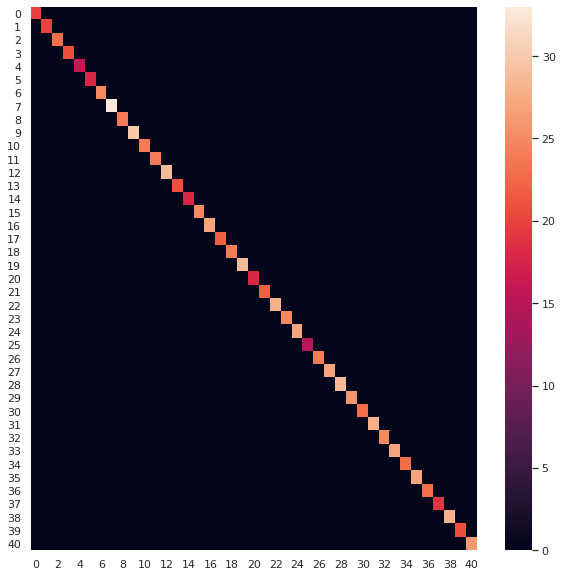

In [ ]:
# Confusino matrix
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(confusion_matrix(y_true = y_test.values, y_pred = prediction), ax = ax)

From the above confusion matrix, the model is unexpectedly giving 1.00 f-score

Below Snippet is for the GUI function

In [ ]:
import pickle 

#Model train
model = GaussianNB()
# model.fit(X, y)
model.fit(X_train, y_train)  # on our dataset

# save model
file_name = path + 'save_model/GaussianNB.pkl'

with open(file_name, "wb") as open_file:
    pickle.dump(model, open_file)

In [ ]:
# THIS FUNCTION IS USED TO GET PREDICTION FROM gaussian model
def prediction_GNB(x_test):
    # load the pretrained model
  file_name = path + 'save_model/GaussianNB.pkl'
  with open(file_name, 'rb') as open_file:
    model = pickle.load(open_file)

  result = model.predict(x_test)
  print(result)
  return result

#### 2. Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# ML Model
def train_model(x_train,y_train):
    #create nn model
    model = Sequential()
    model.add(Dense(100, input_dim=131, activation='relu'))
    model.add(Dense(75, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(41, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, batch_size=64)
    model.save(path+'save_model/NN.h5')
    # if self.verbose:
    #     print('\nTraining Accuracy: ', confidence)
    #     print('\nValidation Prediction: ', y_pred)
    #     print('\nValidation Accuracy: ', accuracy)
    #     print('\nValidation Confusion Matrix: \n', conf_mat)
    #     print('\nCross Validation Score: \n', score)
    #     print('\nClassification Report: \n', clf_report)

    # # Save Trained Model
    # dump(classifier, str(self.model_save_path + self.model_name + ".joblib"))

  
train_model(X_train, Y_train)

Epoch 1/100
62/62 [==============================] - 1s 2ms/step - loss: 2.8433 - accuracy: 0.4126
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.9983
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 1.0000
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 9.1963e-04 - accuracy: 1.0000
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 8.0491e-04 - accuracy: 1.0000
E

This function makes prediction  for the given dataset

using NN and returns the result

In [ ]:
# THIS FUNCTION IS USED TO GET PREDICTION FROM NEURAL NETWORK
def prediction_NN(x_test):
  # Load Trained Model
    model = keras.models.load_model(path+'save_model/NN.h5')
    result = model.predict(x_test)
    return result

### Make Prediction Function

In [ ]:
# Function to Make Predictions on Test Data
# related to USER INTERFACE
def make_prediction(model_name, input_df):
    # check which model user wants to use
    if model_name=="GaussianNB":
      preds = prediction_GNB(input_df)
      return str(preds[0])
    else:
      preds = prediction_NN(input_df)
    
     #FIRST
    predicted = []
    for i in range(preds.shape[0]):
      maxi = 0.0000000001
      index = 0
      for j in range(preds.shape[1]):
        if preds[i][j]>maxi:
          maxi = preds[i][j]
          index = j
      predicted.append(index)

    #SECOND
    predicted2 = []
    for i in range(preds.shape[0]):
      maxi2 = 0.0000000001
      index = 0
      for j in range(preds.shape[1]):
        if preds[i][j]!=maxi:
           if preds[i][j]>maxi2:
              maxi2 = preds[i][j]
              index = j
      predicted2.append(index)

    #THIRD
    predicted3 = []
    for i in range(preds.shape[0]):
      maxi3 = 0.0000000001
      index = 0
      for j in range(preds.shape[1]):
        if preds[i][j]!=maxi and preds[i][j]!=maxi2:
          if preds[i][j]>maxi3:
            maxi3 = preds[i][j]
            index = j
      predicted3.append(index)
    
    #Disease mapping -> where disease are mapped with numerical values

    #First maximum
    print("Disease predicted:",Disease_mapping[predicted[0]], " Confidence: ", preds[0][predicted[0]]*100)
    precaution(Disease_mapping[predicted[0]])
    #Second maximum
    print("Disease predicted:",Disease_mapping[predicted2[0]], " Confidence: ", preds[0][predicted2[0]]*100)
    precaution(Disease_mapping[predicted2[0]])
    #Third maximum
    print("Disease predicted:",Disease_mapping[predicted3[0]], " Confidence: ", preds[0][predicted3[0]]*100)
    precaution(Disease_mapping[predicted3[0]])

## USER INTERFACE

In [ ]:
import ipywidgets as widgets
from ipywidgets import HBox, Label
import difflib

In [ ]:
# assume two models
# i will assign the model variables, to the model that you will create

model_NB = 'NB model'
model_NN = 'NN model'

user can select the model, from which he wants the predictions

### Functions for user interaction

In [ ]:
# function = creates a widget to choose the model

def choose_model(b):
  # define widget to choose model
  global model
  model = widgets.RadioButtons(
    options=[('Naive Bayes', model_NB), ('Neural Network', model_NN)],
    value=model_NB,
    # rows=10,
    description= 'Model: ',
    disabled=False
  )
  
  display(model) 

In [ ]:
# trying to make it better 
def multi_checkbox_widget(options_dict):
    """ Widget with a search field and lots of checkboxes """
    search_widget = widgets.Text()
    output_widget = widgets.Output()
    options = [x for x in options_dict.values()]
    options_layout = widgets.Layout(
        overflow='auto',
        border='1px solid black',
        width='300px',
        height='300px',
        flex_flow='column',
        display='flex'
    )
    
    #selected_widget = widgets.Box(children=[options[0]])
    options_widget = widgets.VBox(options, layout=options_layout)
    #left_widget = widgets.VBox(search_widget, selected_widget)
    multi_select = widgets.VBox([search_widget, options_widget])

    @output_widget.capture()
    def on_checkbox_change(change):
        
        selected_recipe = change["owner"].description
        #print(options_widget.children)
        #selected_item = widgets.Button(description = change["new"])
        #selected_widget.children = [] #selected_widget.children + [selected_item]
        options_widget.children = sorted([x for x in options_widget.children], key = lambda x: x.value, reverse = True)
        
    for checkbox in options:
        checkbox.observe(on_checkbox_change, names="value")

    # Wire the search field to the checkboxes
    @output_widget.capture()
    def on_text_change(change):
        search_input = change['new']
        if search_input == '':
            # Reset search field
            new_options = sorted(options, key = lambda x: x.value, reverse = True)
        else:
            # Filter by search field using difflib.
            #close_matches = difflib.get_close_matches(search_input, list(options_dict.keys()), cutoff=0.0)
            close_matches = [x for x in list(options_dict.keys()) if str.lower(search_input.strip('')) in str.lower(x)]
            new_options = sorted(
                [x for x in options if x.description in close_matches], 
                key = lambda x: x.value, reverse = True
            ) #[options_dict[x] for x in close_matches]
        options_widget.children = new_options

    search_widget.observe(on_text_change, names='value')
    display(output_widget)
    return multi_select

In [ ]:
# function = creates the special widget to choose the symptoms
def choose_symptoms(b):
  # defien the symptoms
  symptoms = [' abdominal_pain', ' abnormal_menstruation', ' acidity', ' acute_liver_failure', ' altered_sensorium', ' anxiety', ' back_pain', ' belly_pain', ' blackheads', ' bladder_discomfort', ' blister', ' blood_in_sputum', ' bloody_stool', ' blurred_and_distorted_vision', ' breathlessness', ' brittle_nails', ' bruising', ' burning_micturition', ' chest_pain', ' chills', ' cold_hands_and_feets', ' coma', ' congestion', ' constipation', ' continuous_feel_of_urine', ' continuous_sneezing', ' cough', ' cramps', ' dark_urine', ' dehydration', ' depression', ' diarrhoea', ' dischromic _patches', ' distention_of_abdomen', ' dizziness', ' drying_and_tingling_lips', ' enlarged_thyroid', ' excessive_hunger', ' extra_marital_contacts', ' family_history', ' fast_heart_rate', ' fatigue', ' fluid_overload', ' foul_smell_of urine', ' headache', ' high_fever', ' hip_joint_pain', ' history_of_alcohol_consumption', ' increased_appetite', ' indigestion', ' inflammatory_nails', ' internal_itching', ' irregular_sugar_level', ' irritability', ' irritation_in_anus', ' joint_pain', ' knee_pain', ' lack_of_concentration', ' lethargy', ' loss_of_appetite', ' loss_of_balance', ' loss_of_smell', ' malaise', ' mild_fever', ' mood_swings', ' movement_stiffness', ' mucoid_sputum', ' muscle_pain', ' muscle_wasting', ' muscle_weakness', ' nausea', ' neck_pain', ' nodal_skin_eruptions', ' obesity', ' pain_behind_the_eyes', ' pain_during_bowel_movements', ' pain_in_anal_region', ' painful_walking', ' palpitations', ' passage_of_gases', ' patches_in_throat', ' phlegm', ' polyuria', ' prominent_veins_on_calf', ' puffy_face_and_eyes', ' pus_filled_pimples', ' receiving_blood_transfusion', ' receiving_unsterile_injections', ' red_sore_around_nose', ' red_spots_over_body', ' redness_of_eyes', ' restlessness', ' runny_nose', ' rusty_sputum', ' scurring', ' shivering', ' silver_like_dusting', ' sinus_pressure', ' skin_peeling', ' skin_rash', ' slurred_speech', ' small_dents_in_nails', ' spinning_movements', ' spotting_ urination', ' stiff_neck', ' stomach_bleeding', ' stomach_pain', ' sunken_eyes', ' sweating', ' swelled_lymph_nodes', ' swelling_joints', ' swelling_of_stomach', ' swollen_blood_vessels', ' swollen_extremeties', ' swollen_legs', ' throat_irritation', ' toxic_look_(typhos)', ' ulcers_on_tongue', ' unsteadiness', ' visual_disturbances', ' vomiting', ' watering_from_eyes', ' weakness_in_limbs', ' weakness_of_one_body_side', ' weight_gain', ' weight_loss', ' yellow_crust_ooze', ' yellow_urine', ' yellowing_of_eyes', ' yellowish_skin', 'itching']

  options_dict = {
    x: widgets.Checkbox(
        description=x, 
        value=False,
        style={"description_width":"0px"}
    ) for x in symptoms
  }

  # create the widget to choose the symptoms
  global widget
  widget = multi_checkbox_widget(options_dict)

  def f(**args):
    
    results = [key for key, value in args.items() if value]
    display(results)


  out = widgets.interactive_output(f, options_dict)
  display(widgets.HBox([widget, out]))

In [ ]:
# this function will print the prediction
# input = choosen model + choosen symptoms
def predict_disease(b):

  print("You choose:", model.value)
  
  # now convert the selected symptoms into a dataframe
  selected_options = [w.description for w in widget.children[1].children if w.value]

  print("You choose these symptoms:", selected_options)
  
  # convert list to set
  input = selected_options

  # list of all columns of test dataframe (given)
  # required
  # column = list(X_test.columns)
  column = [' abdominal_pain', ' abnormal_menstruation', ' acidity', ' acute_liver_failure', ' altered_sensorium', ' anxiety', ' back_pain', ' belly_pain', ' blackheads', ' bladder_discomfort', ' blister', ' blood_in_sputum', ' bloody_stool', ' blurred_and_distorted_vision', ' breathlessness', ' brittle_nails', ' bruising', ' burning_micturition', ' chest_pain', ' chills', ' cold_hands_and_feets', ' coma', ' congestion', ' constipation', ' continuous_feel_of_urine', ' continuous_sneezing', ' cough', ' cramps', ' dark_urine', ' dehydration', ' depression', ' diarrhoea', ' dischromic _patches', ' distention_of_abdomen', ' dizziness', ' drying_and_tingling_lips', ' enlarged_thyroid', ' excessive_hunger', ' extra_marital_contacts', ' family_history', ' fast_heart_rate', ' fatigue', ' fluid_overload', ' foul_smell_of urine', ' headache', ' high_fever', ' hip_joint_pain', ' history_of_alcohol_consumption', ' increased_appetite', ' indigestion', ' inflammatory_nails', ' internal_itching', ' irregular_sugar_level', ' irritability', ' irritation_in_anus', ' joint_pain', ' knee_pain', ' lack_of_concentration', ' lethargy', ' loss_of_appetite', ' loss_of_balance', ' loss_of_smell', ' malaise', ' mild_fever', ' mood_swings', ' movement_stiffness', ' mucoid_sputum', ' muscle_pain', ' muscle_wasting', ' muscle_weakness', ' nausea', ' neck_pain', ' nodal_skin_eruptions', ' obesity', ' pain_behind_the_eyes', ' pain_during_bowel_movements', ' pain_in_anal_region', ' painful_walking', ' palpitations', ' passage_of_gases', ' patches_in_throat', ' phlegm', ' polyuria', ' prominent_veins_on_calf', ' puffy_face_and_eyes', ' pus_filled_pimples', ' receiving_blood_transfusion', ' receiving_unsterile_injections', ' red_sore_around_nose', ' red_spots_over_body', ' redness_of_eyes', ' restlessness', ' runny_nose', ' rusty_sputum', ' scurring', ' shivering', ' silver_like_dusting', ' sinus_pressure', ' skin_peeling', ' skin_rash', ' slurred_speech', ' small_dents_in_nails', ' spinning_movements', ' spotting_ urination', ' stiff_neck', ' stomach_bleeding', ' stomach_pain', ' sunken_eyes', ' sweating', ' swelled_lymph_nodes', ' swelling_joints', ' swelling_of_stomach', ' swollen_blood_vessels', ' swollen_extremeties', ' swollen_legs', ' throat_irritation', ' toxic_look_(typhos)', ' ulcers_on_tongue', ' unsteadiness', ' visual_disturbances', ' vomiting', ' watering_from_eyes', ' weakness_in_limbs', ' weakness_of_one_body_side', ' weight_gain', ' weight_loss', ' yellow_crust_ooze', ' yellow_urine', ' yellowing_of_eyes', ' yellowish_skin', 'itching']

  # convert the input into encoded format
  encoded_input = []

  for s in column:
    if s in input:
      encoded_input.append(1)
    else:
      encoded_input.append(0)

  print(sum(encoded_input))
  print(encoded_input)

  input_df = pd.DataFrame([encoded_input], columns=column, dtype=int)

  print(input_df)

  # SO NOW JUST DO 
  if model.value == 'NB model':
    result = make_prediction("GaussianNB", input_df)
    precaution(result)
  elif model.value == 'NN model':
    result = make_prediction("NN", input_df)
 
  # print(result.shape)
  # print(result)
  # model.predict(df)

In [ ]:
def precaution(result):
  print(sym_details[result])
  print("\n Precautions to be taken ")
  print(f'Precaution 1 : {sym_precs["Precaution_1"][result]}')
  print(f'Precaution 2 : {sym_precs["Precaution_2"][result]}')
  print(f'Precaution 3 : {sym_precs["Precaution_3"][result]}')

This function will process the requirements:

- choose model
- choose symptoms
- print prediction with precautions

In [ ]:
def making_predictions():  
  # define the buttons to choose model
  model_button = widgets.Button(description="choose model")
  output = widgets.Output()
  display(model_button, output)

  # choose the model
  model_button.on_click(choose_model)

  # define the button to selects the symptoms
  symp_button = widgets.Button(description="Select your symptoms:")
  output = widgets.Output()
  display(symp_button, output)

  # choose the symptoms
  symp_button.on_click(choose_symptoms)

  # define the button to selects the symptoms
  predict_button = widgets.Button(description="Predict the disease:")
  output = widgets.Output()
  display(predict_button, output)

  # call prediction function
  predict_button.on_click(predict_disease)


### Run below cell 

- click on choose model: choose model 
- click on select your symptoms: select the symptoms (can search also)
- click on predict the disease: it will show the results


In [ ]:
making_predictions()

Button(description='choose model', style=ButtonStyle())

Output()

Button(description='Select your symptoms:', style=ButtonStyle())

Output()

Button(description='Predict the disease:', style=ButtonStyle())

Output()

RadioButtons(description='Model: ', options=(('Naive Bayes', 'NB model'), ('Neural Network', 'NN model')), val…

Output()

You choose: NN model
You choose these symptoms: [' acidity', ' belly_pain', ' indigestion']
3
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    abdominal_pain   abnormal_menstruation  ...   yellowish_skin  itching
0                0                       0  ...                0        0

[1 rows x 131 columns]
Disease predicted: Fungal infection  Confidence:  15.38681834936142
In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microb

## Conclusion :
1. We tried Naive Bayes and Neural Network model for predicting the disease.
2. In Naive Bayes we are expected to get a single disease prediction for the symptoms selected by the user.
3. In Neural Network we are getting the vectorised values of each symptom possibilities so we display the top 3 symptoms on the basis of the decreasing order of their confidence values.
4. The outcomes are sometimes okay to real world disease-symptoms, but most of the time they are unreliable. Ideally we shouldn't get 100% accuracy on both the models, but we are getting it because of the following reasons -
  i. Presence of too many independent variables.
  ii. high correlation between independent variables.

In Neural Network we achieve 99+ accuracy in just 3 epochs. So I guess Neural Network is working fine, instead of Naive Bayes we could try Decision Tree or Random Forest.

5. This Project could be improved if we have a more reliable and diverse dataset. It's the dataset that is determining the performance.